# Exploratory Data Analysis (EDA) for Fraud Detection

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style for plots
plt.style.use('seaborn-v0_8')


### Create visualizations directory if it doesn't exist

In [2]:
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

### Load preprocessed data

In [2]:
fraud_data = pd.read_csv('../data/preprocessed_fraud_data.csv')
creditcard_data = pd.read_csv('../data/preprocessed_creditcard_data.csv')

### Basic Data Inspection

In [14]:
print("Fraud Data Sample:")
print(fraud_data.head(4))
print("\nCredit Card Data Sample:")
print(creditcard_data.head(4))

Fraud Data Sample:
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   

       device_id source browser sex  age    ip_address  class  purchase_hour  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0              2   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0              1   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1             18   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0             13   

   purchase_day_of_week  time_since_signup  ip_numeric        country  
0                     5        1251.856111   732758368          Japan  
1                     0           4.984444   350311387  United States  
2  

### Class Distribution Analysis (Imbalance Analysis)

In [3]:
# Count the number of Non-fraud (0) and Fraud (1) cases
class_counts = fraud_data['class'].value_counts()
class_counts_credit = creditcard_data['Class'].value_counts()

# Display the result
print("E-Commerce Fraud Class Distribution:")
print(class_counts)
print("Credit Card Fraud Class Distribution:")
print(class_counts_credit)

E-Commerce Fraud Class Distribution:
class
0    136961
1     14151
Name: count, dtype: int64
Credit Card Fraud Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


#### Fraud vs Non-fraud transactions in e-commerce data

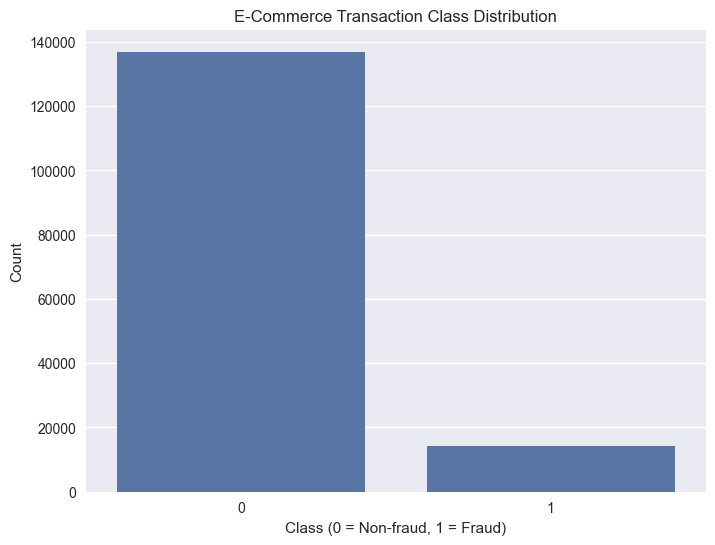

In [5]:

plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=fraud_data)
plt.title('E-Commerce Transaction Class Distribution')
plt.xlabel('Class (0 = Non-fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.savefig('visualizations/ecommerce_class_distribution.png')
plt.show()

#### Fraud vs Non-fraud transactions in credit card data

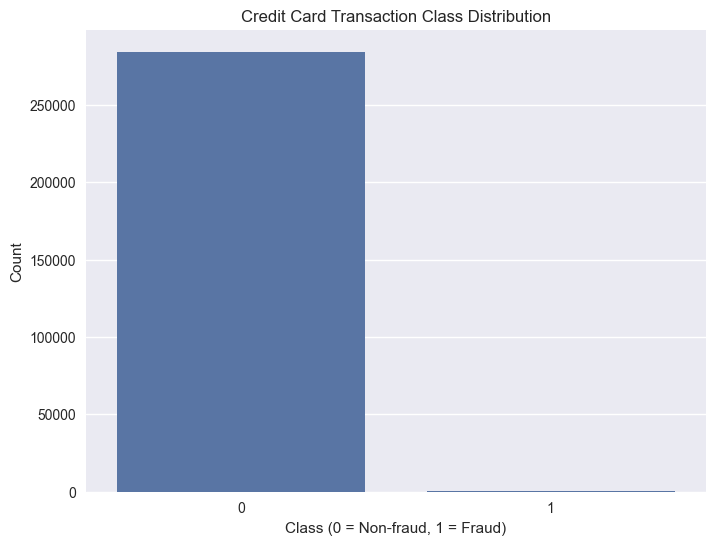

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=creditcard_data)
plt.title('Credit Card Transaction Class Distribution')
plt.xlabel('Class (0 = Non-fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.savefig('visualizations/creditcard_class_distribution.png')
plt.show()

## Feature Analysis

### E-Commerce Data Analysis

#### Time since signup vs Fraud

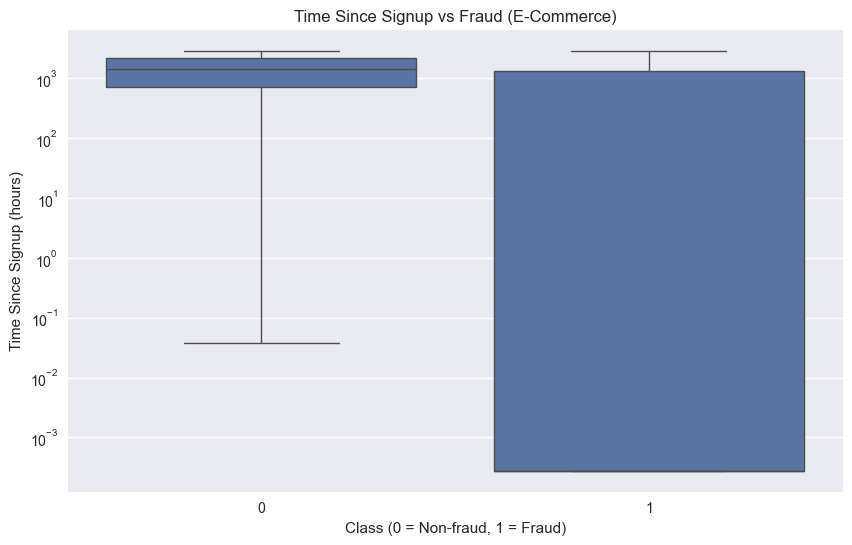

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='time_since_signup', data=fraud_data)
plt.title('Time Since Signup vs Fraud (E-Commerce)')
plt.xlabel('Class (0 = Non-fraud, 1 = Fraud)')
plt.ylabel('Time Since Signup (hours)')
plt.yscale('log')
plt.savefig('visualizations/time_since_signup_vs_fraud.png')
plt.show()

#### Purchase value vs Fraud

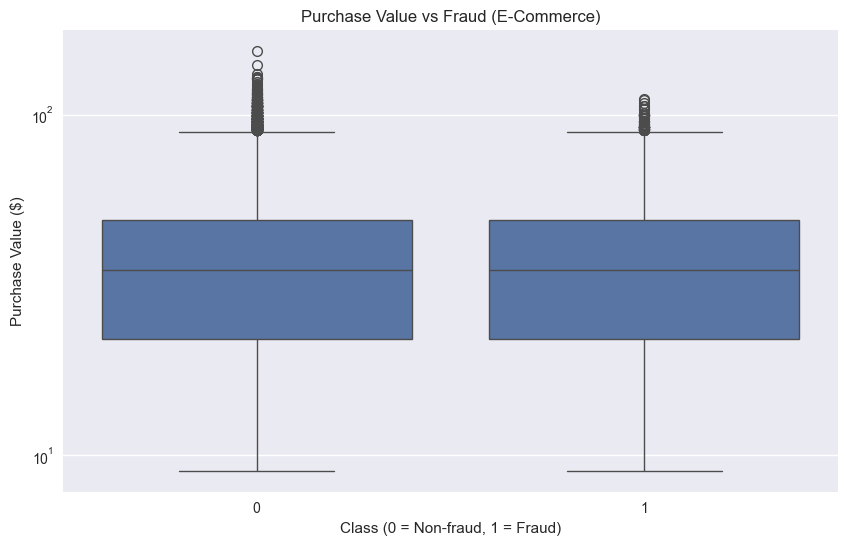

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.title('Purchase Value vs Fraud (E-Commerce)')
plt.xlabel('Class (0 = Non-fraud, 1 = Fraud)')
plt.ylabel('Purchase Value ($)')
plt.yscale('log')
plt.savefig('visualizations/purchase_value_vs_fraud.png')
plt.show()

#### Purchase hour vs Fraud

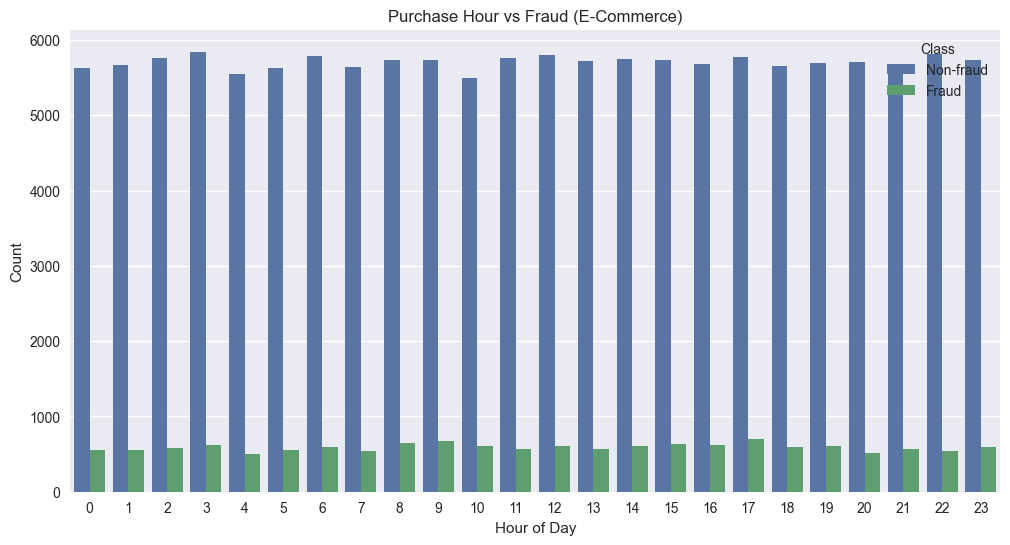

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='purchase_hour', hue='class', data=fraud_data)
plt.title('Purchase Hour vs Fraud (E-Commerce)')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Non-fraud', 'Fraud'])
plt.savefig('visualizations/purchase_hour_vs_fraud.png')
plt.show()

#### Purchase day of week vs Fraud

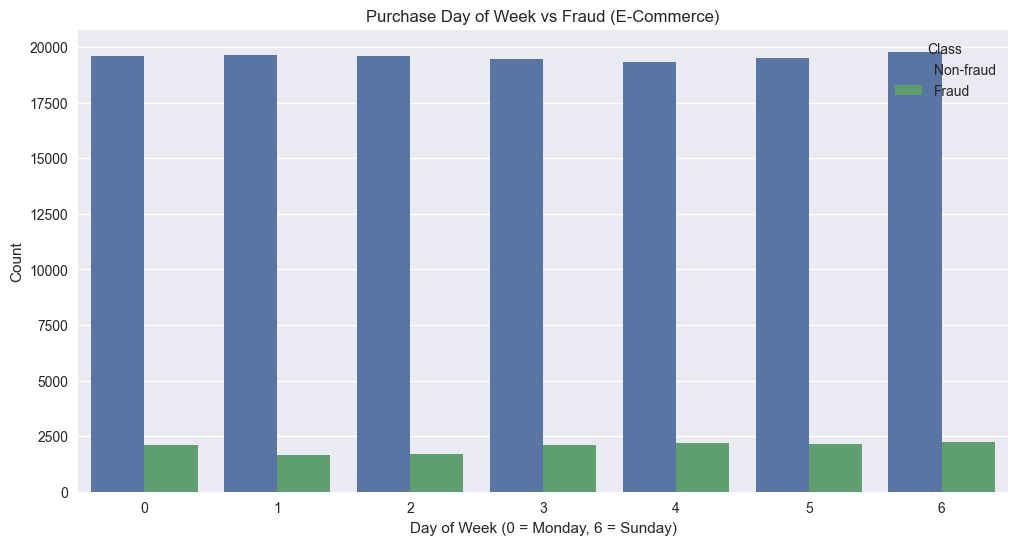

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='purchase_day_of_week', hue='class', data=fraud_data)
plt.title('Purchase Day of Week vs Fraud (E-Commerce)')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Non-fraud', 'Fraud'])
plt.savefig('visualizations/purchase_day_of_week_vs_fraud.png')
plt.show()

### Credit Card Data Analysis

#### Amount vs Fraud

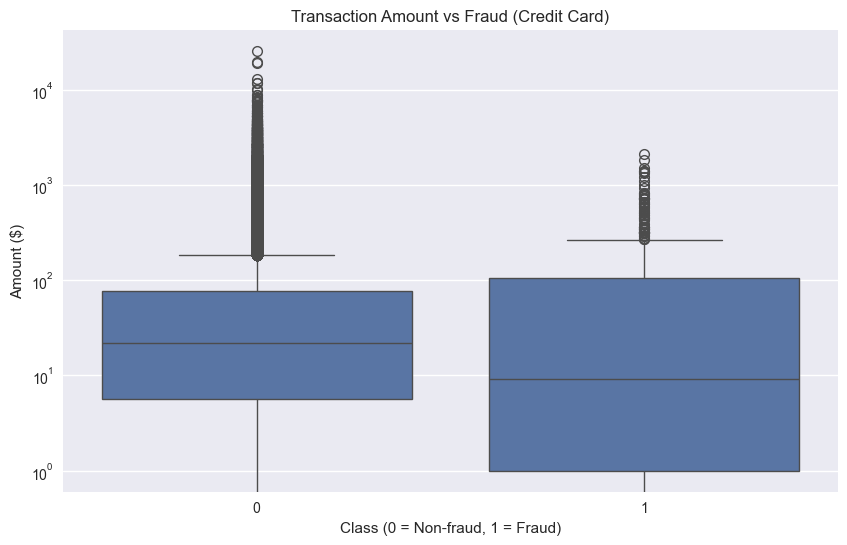

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=creditcard_data)
plt.title('Transaction Amount vs Fraud (Credit Card)')
plt.xlabel('Class (0 = Non-fraud, 1 = Fraud)')
plt.ylabel('Amount ($)')
plt.yscale('log')
plt.savefig('visualizations/creditcard_amount_vs_fraud.png')
plt.show()

## Correlation Analysis (Credit Card Data)

### Correlation matrix for credit card data

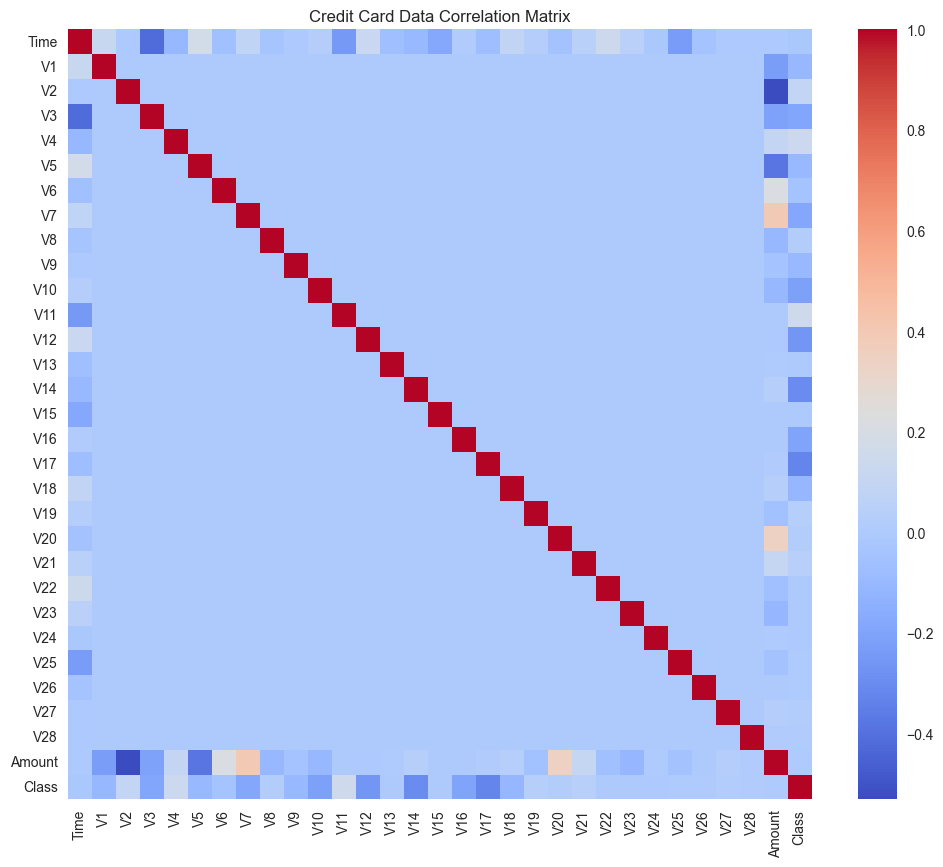

In [12]:
plt.figure(figsize=(12, 10))
corr = creditcard_data.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Credit Card Data Correlation Matrix')
plt.savefig('visualizations/creditcard_correlation_matrix.png')
plt.show()

## Country Analysis (E-Commerce Data)

### Top countries by transaction volume

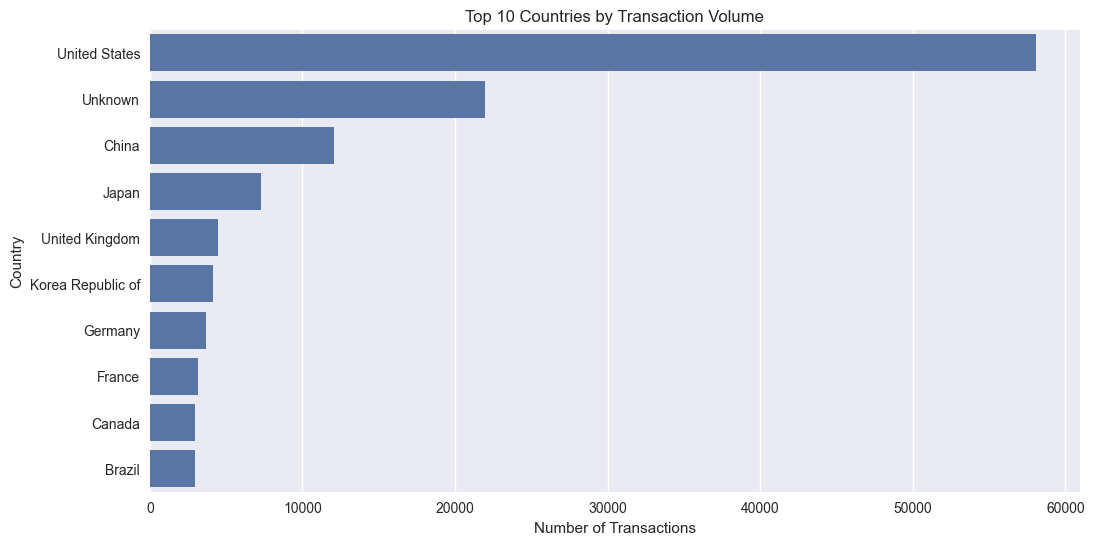

In [13]:
top_countries = fraud_data['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.countplot(y='country', data=fraud_data, order=top_countries.index)
plt.title('Top 10 Countries by Transaction Volume')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.savefig('visualizations/top_countries.png')
plt.show()